# Stellar Luminosity Modeling
## Part I — Linear Regression with One Feature

**Objective:**  
Model stellar luminosity (L) as a linear function of stellar mass (M) using linear regression implemented from first principles.

$$
\hat{L} = wM + b
$$


No machine-learning libraries are used. All components (model, loss, gradients, optimization) are implemented explicitly.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#(solar masses)
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])

#(solar luminosities)
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])


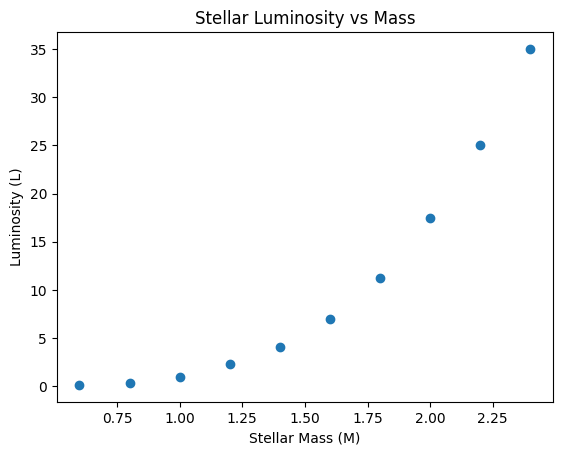

In [3]:
plt.figure()
plt.scatter(M, L)
plt.xlabel("Stellar Mass (M)")
plt.ylabel("Luminosity (L)")
plt.title("Stellar Luminosity vs Mass")
plt.show()


### Dataset Analysis

The data shows that luminosity increases as stellar mass increases.
However, this increase is not constant across all values. For smaller
masses the change is gradual, while for larger masses the luminosity
grows much faster.

This suggests that a straight line may describe the general trend, but
it will not perfectly represent the behavior of all stars.



In [22]:
def predict(M, w, b):
    """
    Compute the predicted luminosity

    Parameters:
        M : array-like
            Stellar mass
        w : float
            Weight 
        b : float
    """
    return w * M + b


In [23]:
def mse_cost(M, L, w, b):
    L_hat = predict(M, w, b)
    return np.mean((L_hat - L)**2)


In [24]:
w_test = 1.0
b_test = 0.0
mse_cost(M, L, w_test, b_test)


194.9275

### Model and Loss Function

A linear model is used to relate stellar mass to luminosity using a
straight-line approximation. The model parameters are adjusted to reduce
the difference between predicted and observed values.

The Mean Squared Error is used to measure how far predictions are from
the real data, giving more importance to larger errors.


In [25]:
# Ranges for w and b
w_values = np.linspace(-5, 20, 100)
b_values = np.linspace(-20, 20, 100)


In [26]:
W, B = np.meshgrid(w_values, b_values)
J = np.zeros(W.shape)


In [27]:
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J[i, j] = mse_cost(M, L, W[i, j], B[i, j])


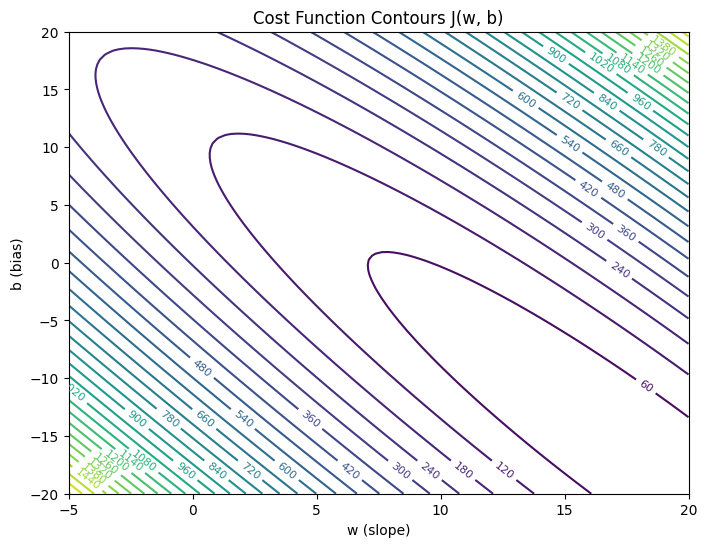

In [28]:
plt.figure(figsize=(8,6))
contour = plt.contour(W, B, J, levels=30)
plt.clabel(contour, inline=True, fontsize=8)
plt.xlabel("w (slope)")
plt.ylabel("b (bias)")
plt.title("Cost Function Contours J(w, b)")
plt.show()


### Cost Function Surface

The contour plot shows how the error changes for different values of the
parameters w and b. Each curve represents combinations that produce the
same level of error.

The shape of the contours indicates that there is a single minimum,
which corresponds to the best parameter values for the model.



### Gradient Derivation

The cost function is defined as:

$$
J(w,b) = \frac{1}{N} \sum_{i=1}^{N} (\hat{L}_i - L_i)^2
$$

with:

$$
\hat{L}_i = w M_i + b
$$

The partial derivatives of the cost function with respect to the parameters are:

$$
\frac{\partial J}{\partial w} = \frac{2}{N} \sum_{i=1}^{N} (\hat{L}_i - L_i) M_i
$$

$$
\frac{\partial J}{\partial b} = \frac{2}{N} \sum_{i=1}^{N} (\hat{L}_i - L_i)
$$


In [13]:
def compute_gradients_loop(M, L, w, b):
    """
    Compute gradients using explicit loops.
    """
    N = len(M)
    dw = 0.0
    db = 0.0
    
    for i in range(N):
        L_hat = w * M[i] + b
        error = L_hat - L[i]
        dw += error * M[i]
        db += error
    
    dw = (2 / N) * dw
    db = (2 / N) * db
    
    return dw, db


In [14]:
dw_test, db_test = compute_gradients_loop(M, L, w_test, b_test)
dw_test, db_test


(-37.886, -17.72)

In [15]:
def compute_gradients_vectorized(M, L, w, b):
    """
    Compute gradients using NumPy vectorization.
    """
    N = len(M)
    L_hat = predict(M, w, b)
    error = L_hat - L
    
    dw = (2 / N) * np.sum(error * M)
    db = (2 / N) * np.sum(error)
    
    return dw, db


In [16]:
dw_vec, db_vec = compute_gradients_vectorized(M, L, w_test, b_test)

dw_test, db_test, dw_vec, db_vec


(-37.886, -17.72, -37.886, -17.72)

### Gradient Computation

Gradients indicate how the error changes when the model parameters are
slightly modified. They are used to decide how to update the parameters
to reduce the error.

Both a loop-based and a vectorized approach were implemented and produce
the same results, confirming that the calculations are correct.



In [17]:
def gradient_descent(M, L, w_init, b_init, alpha, iterations):
    """
    Gradient Descent optimization for linear regression.
    """
    w = w_init
    b = b_init
    loss_history = []

    for it in range(iterations):
    
        dw, db = compute_gradients_vectorized(M, L, w, b)
        
    
        w = w - alpha * dw
        b = b - alpha * db
        
        # Compute and store cost
        cost = mse_cost(M, L, w, b)
        loss_history.append(cost)

    return w, b, loss_history


In [18]:

w0 = 0.0
b0 = 0.0

alpha = 0.01
iterations = 1000

w_final, b_final, loss_history = gradient_descent(
    M, L, w0, b0, alpha, iterations
)
w_final, b_final


(16.283907559235097, -13.776202412299618)

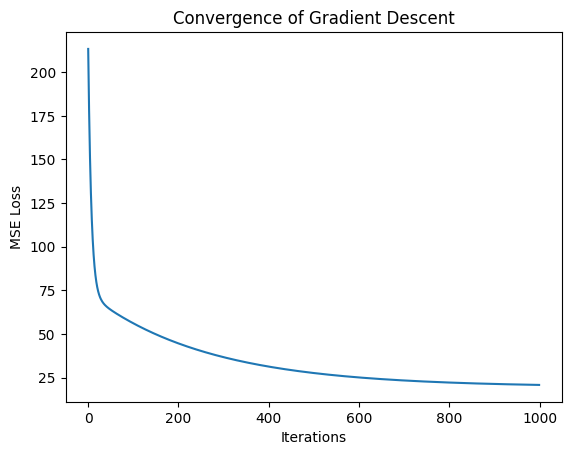

In [19]:
plt.figure()
plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Convergence of Gradient Descent")
plt.show()


### Convergence Analysis

The loss decreases over the iterations and eventually stabilizes. This
behavior shows that the training process is working correctly.

The smooth decrease of the error indicates that the learning rate allows
the model to improve without becoming unstable.




In [20]:
learning_rates = [0.001, 0.01, 0.05]
iterations = 1000

results = {}

for alpha in learning_rates:
    w_f, b_f, loss_h = gradient_descent(M, L, w0, b0, alpha, iterations)
    results[alpha] = (w_f, b_f, loss_h[-1])
    print(f"alpha={alpha}: w={w_f:.4f}, b={b_f:.4f}, final loss={loss_h[-1]:.4f}")


alpha=0.001: w=7.9563, b=0.0095, final loss=56.2574
alpha=0.01: w=16.2839, b=-13.7762, final loss=20.7992
alpha=0.05: w=18.1294, b=-16.8340, final loss=19.5903


### Learning Rate Experiments

Different learning rates were tested to observe their effect on training.
Small values lead to slow improvement, while larger values speed up the
process but may cause instability.

These tests show the importance of choosing a balanced learning rate.



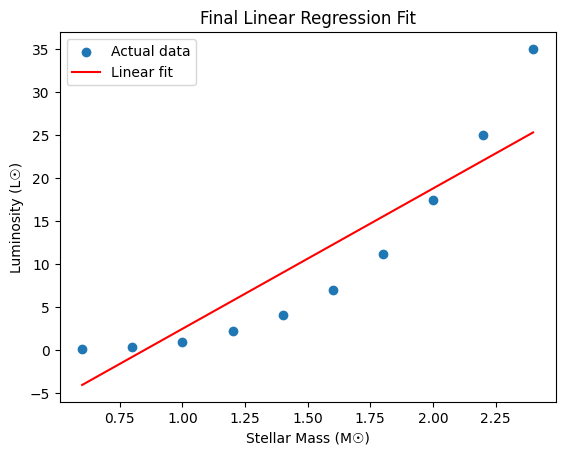

In [21]:
L_pred = predict(M, w_final, b_final)

plt.figure()
plt.scatter(M, L, label="Actual data")
plt.plot(M, L_pred, color="red", label="Linear fit")
plt.xlabel("Stellar Mass (M☉)")
plt.ylabel("Luminosity (L☉)")
plt.title("Final Linear Regression Fit")
plt.legend()
plt.show()


### Final Model Discussion

The linear model captures the general increase of luminosity with mass,
but it does not fit all data points equally well. Errors become larger
for stars with higher mass.

This behavior shows that a simple linear model is limited and motivates
the use of more complex models.

